In [48]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt 

In [49]:
# read csv
df = pd.read_csv('data/PHY_TRAIN.csv')

In [50]:
# splitting target and predictors
y = df['target']
X = df.drop(['target', 'exampleid'],axis=1)
feature_names = list(X.columns)

In [51]:
# STEP 1: Data Exploration
X.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.155606,0.084876,-0.050354,-0.000060,0.126569,0.049887,-0.038344,0.002860,0.848353,0.673485,...,0.008120,0.000478,0.003198,0.052807,0.066944,-0.014101,-0.001460,0.094480,0.002843,0.066545
std,0.414875,0.295335,0.253748,0.392916,0.400694,0.223713,0.214168,0.322077,0.453585,0.511087,...,0.769302,0.446978,0.381329,0.180710,0.283114,0.176896,0.295939,0.315841,0.019081,0.223091
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000,-0.999998,-0.908001,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522596,0.250301,...,-1.000000,-0.000013,-0.001582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.787572,0.599672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.105687,1.018601,...,1.000000,0.000015,0.003002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.639020,3.429590,0.999954,1.000000,2.719006,3.054644,0.999274,1.000000,6.699783,5.283748,...,1.000000,0.999999,0.907744,0.999953,3.429590,0.999869,1.000000,3.000000,0.385513,1.000000


In [52]:
# Data exploration for target variables
y.describe()

count    50000.000000
mean         0.497220
std          0.499997
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [53]:
y.value_counts()

# sns.countplot(x = y, data=y)
# plt.show

0    25139
1    24861
Name: target, dtype: int64

In [54]:
y

0        0
1        0
2        1
3        0
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    0
Name: target, Length: 50000, dtype: int64

In [55]:
# STEP 2: Missing value indicator
from sklearn.impute import MissingIndicator
# True indicates Missing Value, False indicates no missing value

# indicator = MissingIndicator(features='all')
indicator = MissingIndicator(features='missing-only')
missing = indicator.fit_transform(X)
# converts boolean to integers
missing.astype(int)

array([[1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [56]:
# STEP 3: Replace missing values with mean
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer()
mean_imputer = simple_imputer.fit(X)
df1 = pd.DataFrame(mean_imputer.transform(X), columns = feature_names)

# Replace missing values with KNN
# causes my kernel to die
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X)

In [57]:
y = y.to_numpy()

In [58]:
# STEP 4 Transformation of selected variables are recommended if you use logistic regression, however,
# for students without data preparation class can ignore this part

# Normalizing coefficients (Accuracy decreases)
column_maxes = df1.max()
column_mins = df1.min()
df_min = column_mins.min()
df_max = column_maxes.max()
normalized_df = (df1 - df_min) / (df_max - df_min)
df1 = normalized_df

In [59]:
# STEP 5 Modeling
# n_jobs at -1 WILL USE UP A LOT OF MEMORY for your computer.
# It may cause the computer to become VERY SLOW at doing anything else.
from sklearn.model_selection import cross_val_score
from time import time
t0 = time()
# Logistic Regression w/o Interaction Terms
logitModel = LogisticRegression(penalty='l2', n_jobs=-1)
t1 = time()
logitValues = cross_val_score(logitModel, df1, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
logitMean = logitValues.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", logitMean)
#******Might want to try Recursive Feature Elimination

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


Time to run the model 0.0
Time to run 5-Folds 3.371889352798462
Mean accuracy through 5-folds 0.50136


In [60]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe = RFE(logitModel, 10)
fit = rfe.fit(df1, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False False False False False False False  True
  True False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False  True False False  True False False  True  True  True False
 False False False False False False]
Feature Ranking: [16 60 42  2 49 55 29  4 33 19 12  1  1  7 14 15 25 44 31  1 13 36 17 59
 18 20 56 54 65 50  1  5  8 47 40 30 58 39 11 45 53 38 22 21 23 26 64 66
 67 68 69  9 61 48 63  1  3  6 52 24 27 35  1 62 28  1 32 57  1  1  1 34
 41 37 10 46 51 43]


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#rfc = RandomForestClassifier(random_state=101)
rfc = LogisticRegression(penalty='l2',n_jobs=-1)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(df1, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=-1, penalty='l2',
                                   random_state=None, solver='lbfgs',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [62]:
# What?
clf = LogisticRegression(penalty="l2")
clf.fit(df1,y)
thetaLasso=clf.coef_
#print("The regularized theta using lasso regression:\n",thetaLasso.reshape(78,1))

In [63]:
logitModel.fit(df1,y)
baseline = logitModel.score(df1,y)
baseline

0.5037

In [64]:
# Logistic regression with at least three two-way interactions
# this part might not work for multiple features n

score = 0
tempDF = df1.copy()
interactions = list()
feature_indexes = list(range(len(X.columns)))
newColumns = {}
for index in feature_indexes:
   tempDF.rename(columns={X.columns[index]:str(index)}, inplace=True)

In [66]:
t0 = time()
for feature_A in tempDF.columns:
    newA = True
    for feature_B in tempDF.columns:
        isInteractionColumn = feature_A == "interaction" or feature_B == "interaction" 
        if not isInteractionColumn and int(feature_A) < int(feature_B):
            if newA:
                print(feature_A, flush=True)
                newA = False
            print("\t",feature_B, flush=True)
            tempDF['interaction'] = tempDF[feature_A] * tempDF[feature_B]
            logitModel.fit(tempDF, y)
            score = logitModel.score(tempDF,y)
            if score > baseline:
                interactions.append((feature_A, feature_B, round(score,8)))
t1 = time()
print('Baseline R2: %.3f' % baseline)
print('Top 10 interactions: %s' % sorted(interactions ,key = lambda x:x[2], reverse=True)[:10])
print("Time to gather all interactions and determine the best", t1 - t0)

0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 5

In [68]:
# Logistic Regression with top three interaction terms added on\n",
interactionDF = df1.copy()
interactionDF["Interaction_One"] = interactionDF[64] * interactionDF[65]
interactionDF["Interaction_Two"] = interactionDF[23] * interactionDF[55]
interactionDF["Interaction_Three"] = interactionDF[18] * interactionDF[65]

t0 = time()
logitModel = LogisticRegression(n_jobs=-1)
t1 = time()
logitValues = cross_val_score(logitModel, interactionDF, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
logitMean = logitValues.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", logitMean)

interactionDF.drop(columns=[64, 65, 23, 55, 18], inplace=True)
t0 = time()
logitModel = LogisticRegression(n_jobs=-1)
t1 = time()
logitValues = cross_val_score(logitModel, interactionDF, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
logitMean = logitValues.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", logitMean)

KeyError: '64'

In [69]:
# ---------Random Forest----------
import sklearn
from sklearn.ensemble import RandomForestClassifier
# sorted(sklearn.metrics.SCORERS.keys())

# Gini
t0 = time()
rfGini = RandomForestClassifier(criterion="gini", n_estimators = 100, random_state = 42, n_jobs=-1, verbose=1)
t1 = time()
dtGiniValues = cross_val_score(rfGini, df1, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
dtGiniMean = dtGiniValues.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", dtGiniMean)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.3s finished


Time to run the model 0.0
Time to run 5-Folds 41.47376728057861
Mean accuracy through 5-folds 0.7150000000000001


In [70]:
# Entropy
t0 = time()
rfEntropy = RandomForestClassifier(criterion="entropy", n_estimators = 100, random_state = 42, n_jobs=-1, verbose=1)
t1 = time()
dtEntropyValues = cross_val_score(rfEntropy, df1, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
dtEntropyMean = dtEntropyValues.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", dtEntropyMean)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.0s finished


Time to run the model 0.0
Time to run 5-Folds 47.183666706085205
Mean accuracy through 5-folds 0.71582


In [71]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
t0 = time()
gb_clf = GradientBoostingClassifier()
t1 = time()
gbclfScores = cross_val_score(gb_clf, df1, y=y, n_jobs=-1, verbose=1, scoring="accuracy")
t2 = time()
gbclfMean = gbclfScores.mean()
print("Time to run the model", t1 - t0)
print("Time to run 5-Folds", t2 - t1)
print("Mean accuracy through 5-folds", gbclfMean)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


Time to run the model 0.0
Time to run 5-Folds 94.6479377746582
Mean accuracy through 5-folds 0.7237199999999999


In [72]:
# Step 6: Comparisons of fitted models using c-statistics, i.e., AUC of the ROC curve

# Splitting data into 5 folds in order to use the same data for each ROC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

# AUC Scores:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#-------- Logistic Regression
logitModel.fit(X_train, y_train)
probs1 = logitModel.predict_proba(X_test)
probs1 = probs1[:, 1]
auc_logit = roc_auc_score(y_test, probs1)
print('Logit AUC: %.2f' % auc_logit)
#-------- Gradient Boosting
gb_clf.fit(X_train, y_train)
probs2 = gb_clf.predict_proba(X_test)
probs2 = probs2[:, 1]
auc_gbf = roc_auc_score(y_test, probs2)
print('GBF AUC: %.2f' % auc_gbf)
#-------- Random Forest Gini
rfGini.fit(X_train, y_train)
probs3 = rfGini.predict_proba(X_test)
probs3 = probs3[:, 1]
auc_rfGini = roc_auc_score(y_test, probs3)
print('RF Gini AUC: %.2f' % auc_rfGini)
#-------- Random Forest Entropy
rfEntropy.fit(X_train, y_train)
probs4 = rfEntropy.predict_proba(X_test)
probs4 = probs4[:, 1]
auc_rfEntropy = roc_auc_score(y_test, probs4)
print('Entropy Gini AUC: %.2f' % auc_rfEntropy)

def plot_roc_curve(fpr, tpr, plotFileName):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig(plotFileName)
    plt.show()

Logit AUC: 0.57
GBF AUC: 0.81
RF Gini AUC: 0.80
Entropy Gini AUC: 0.80


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


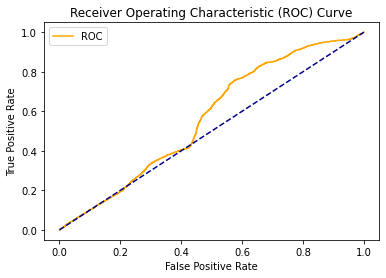

In [73]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr, "logitROC.png")

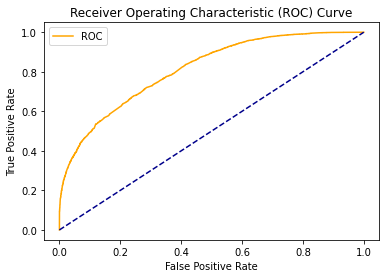

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, probs2)
plot_roc_curve(fpr, tpr, "gradientROC.png")

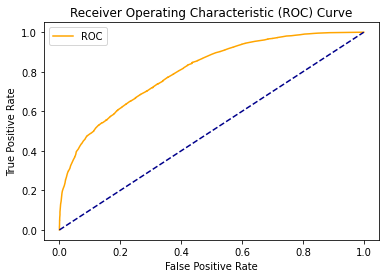

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, probs3)
plot_roc_curve(fpr, tpr, "rfGiniROC")

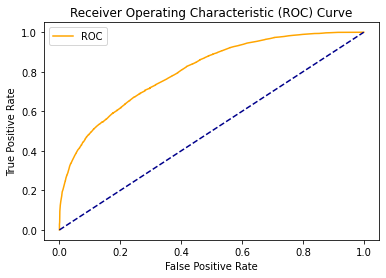

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, probs4)
plot_roc_curve(fpr, tpr, "rfEntropyROC")

